In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read CSV
file_path = 'Data.csv'
df = pd.read_csv(file_path)

In [60]:
print(df.columns)
print(df.shape)

Index(['fW', 'current', 'ind', 'Rd', 'Cs', 'Rs', 'Stage 1 Region',
       'channel 0.1G attenuation', 'channel 3.5G attenuation',
       'channel 7G attenuation', 'channel 14G attenuation',
       'channel 28G attenuation', 'stage 1 0.1G attenuation',
       'stage 2 0.1G attenuation', 'Hard Constraint of 2 on 0.1G Status',
       'stage 1 3.5G attenuation', 'stage 2 3.5G attenuation',
       'stage 1 7G attenuation', 'stage 2 7G attenuation',
       'stage 1 14G attenuation', 'stage 2 14G attenuation',
       'stage 1 28G attenuation', 'stage 2 28G attenuation'],
      dtype='object')
(5001, 23)


In [61]:
print(df.isnull().sum())

fW                                     0
current                                0
ind                                    0
Rd                                     0
Cs                                     0
Rs                                     0
Stage 1 Region                         0
channel 0.1G attenuation               0
channel 3.5G attenuation               0
channel 7G attenuation                 0
channel 14G attenuation                0
channel 28G attenuation                0
stage 1 0.1G attenuation               0
stage 2 0.1G attenuation               0
Hard Constraint of 2 on 0.1G Status    0
stage 1 3.5G attenuation               0
stage 2 3.5G attenuation               0
stage 1 7G attenuation                 0
stage 2 7G attenuation                 0
stage 1 14G attenuation                0
stage 2 14G attenuation                0
stage 1 28G attenuation                0
stage 2 28G attenuation                0
dtype: int64


In [62]:
# Show head
print(df.head())

         fW   current           ind      Rd            Cs     Rs  \
0  0.000003  0.000800  3.000000e-09   625.0  6.670000e-14  700.0   
1  0.000003  0.000851  2.180000e-09   983.4  1.320000e-13  786.2   
2  0.000005  0.002167  1.190000e-09   183.8  3.590000e-14  709.9   
3  0.000003  0.001467  9.630000e-10  1080.0  4.100000e-13  720.8   
4  0.000007  0.001899  1.720000e-09  1182.0  1.220000e-13  467.2   

   Stage 1 Region  channel 0.1G attenuation  channel 3.5G attenuation  \
0               1                  -0.01972                    -6.577   
1               0                  -0.01970                    -6.581   
2               1                  -0.01972                    -6.579   
3               0                  -0.01969                    -6.582   
4               0                  -0.01960                    -6.595   

   channel 7G attenuation  ...  stage 2 0.1G attenuation  \
0                  -9.067  ...                    -1.492   
1                  -9.077  ...  

In [63]:
# Summary statistics for numeric columns
print(df.describe())

                fW      current           ind           Rd            Cs  \
count  5001.000000  5001.000000  5.001000e+03  5001.000000  5.001000e+03   
mean      0.000006     0.001502  1.510130e-09   741.286539  4.945844e-13   
std       0.000003     0.000581  8.630843e-10   431.421825  2.881890e-13   
min       0.000001     0.000500  4.010000e-15    10.840000  1.210000e-15   
25%       0.000003     0.001008  7.530000e-10   364.200000  2.400000e-13   
50%       0.000005     0.001494  1.510000e-09   730.300000  4.950000e-13   
75%       0.000008     0.002010  2.250000e-09  1119.000000  7.430000e-13   
max       0.000010     0.002500  3.000000e-09  1500.000000  1.000000e-12   

                Rs  Stage 1 Region  channel 0.1G attenuation  \
count  5001.000000     5001.000000               5001.000000   
mean    748.907788        0.354329                 -0.019672   
std     435.547872        0.478357                  0.000071   
min      10.300000        0.000000                 -0.02019

In [64]:
target_cols = [
    "stage 1 3.5G attenuation",
    "stage 2 3.5G attenuation",
    "stage 1 7G attenuation",
    "stage 2 7G attenuation",
    "stage 1 14G attenuation",
    "stage 2 14G attenuation",
    "stage 1 28G attenuation",
    "stage 2 28G attenuation",
]

In [65]:
feature_columns = [col for col in df.columns if col not in target_cols]

y = df[target_cols]

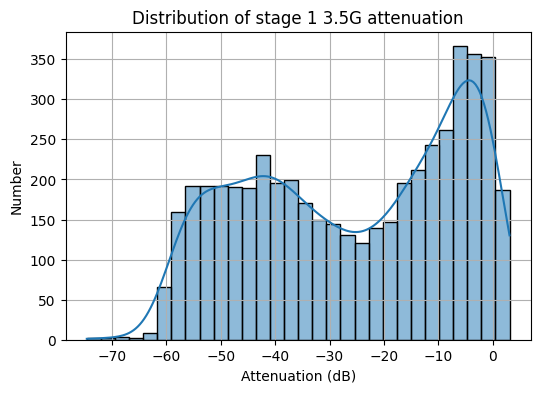

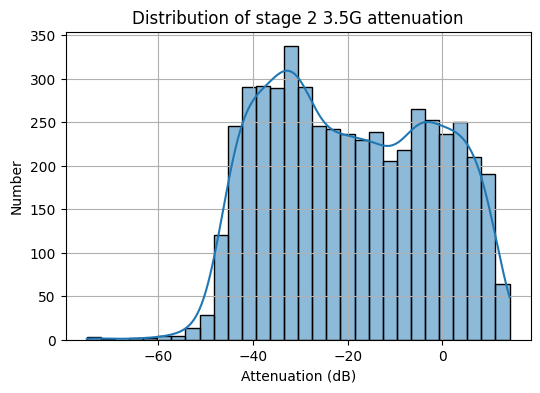

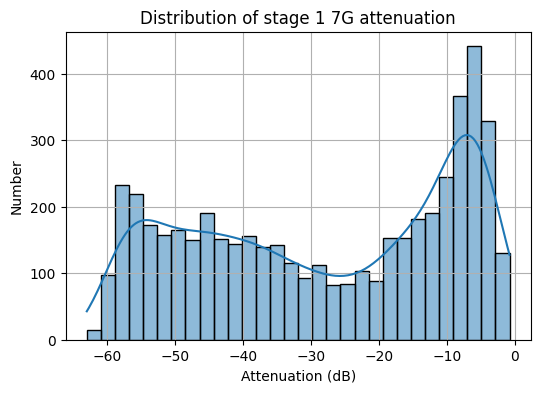

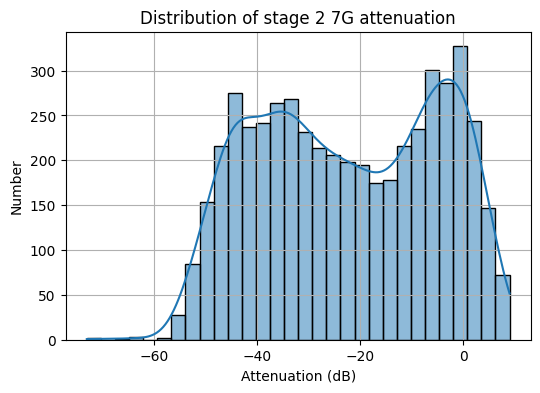

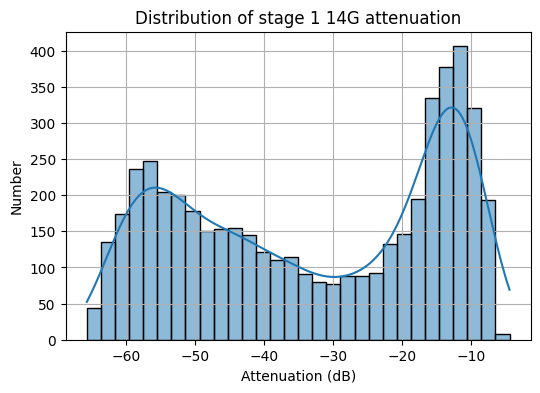

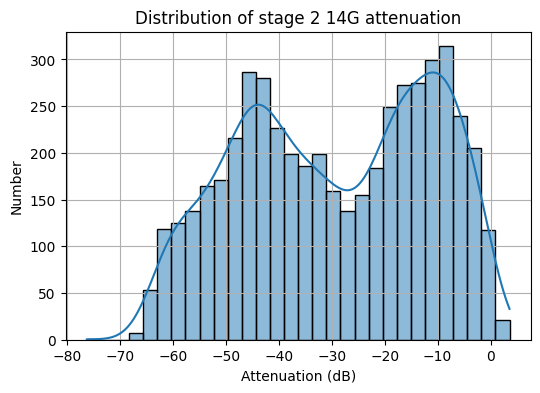

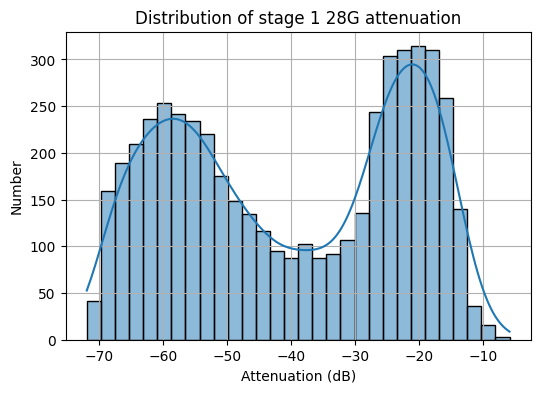

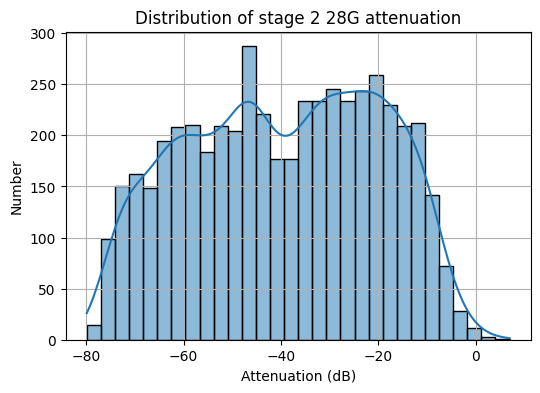

In [66]:
for col in target_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(y[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Attenuation (dB)")
    plt.ylabel("Number")
    plt.grid(True)
    plt.show()

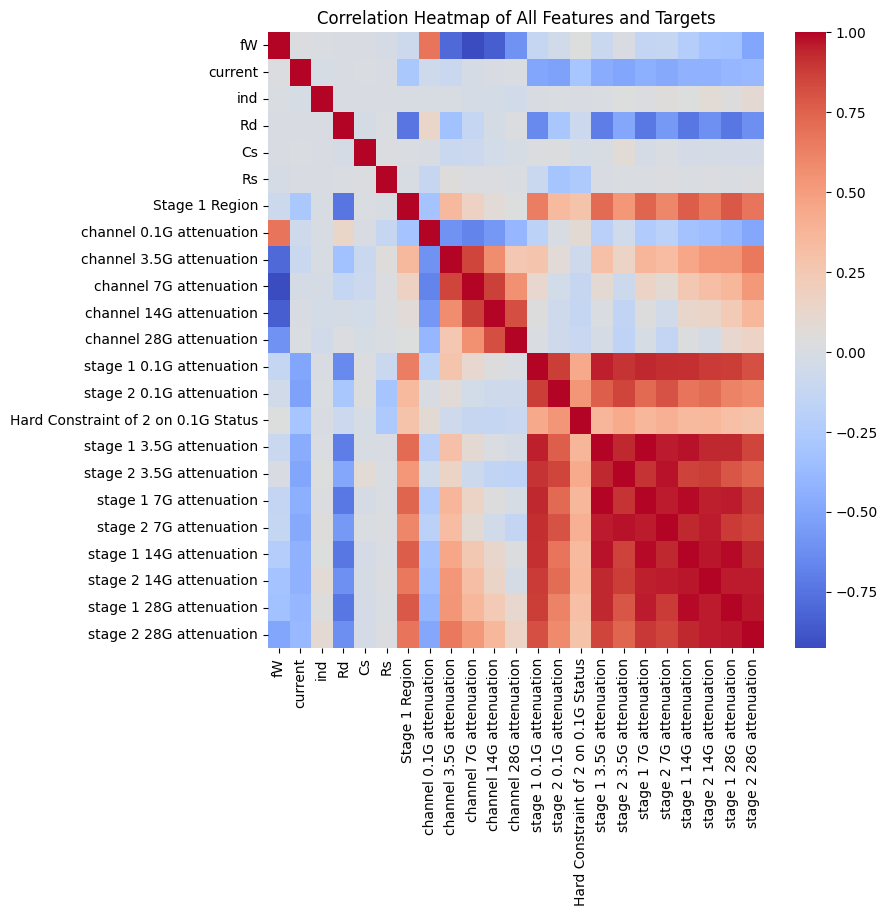

In [67]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of All Features and Targets")
plt.show()

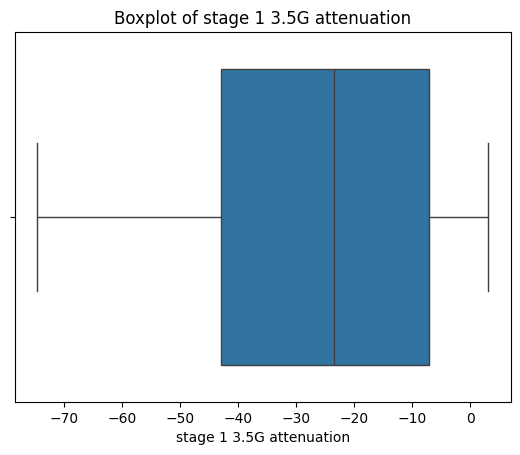

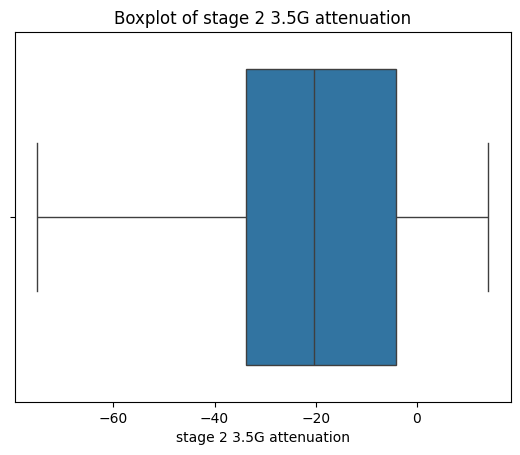

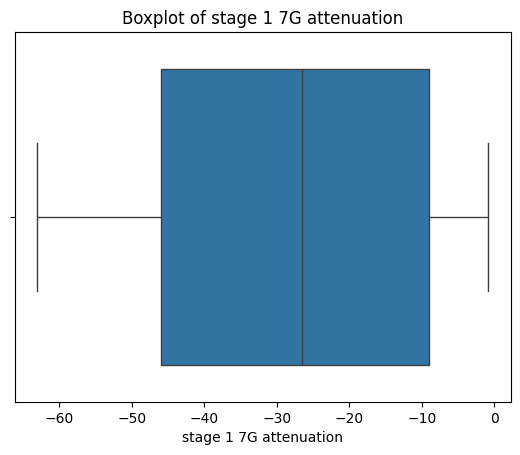

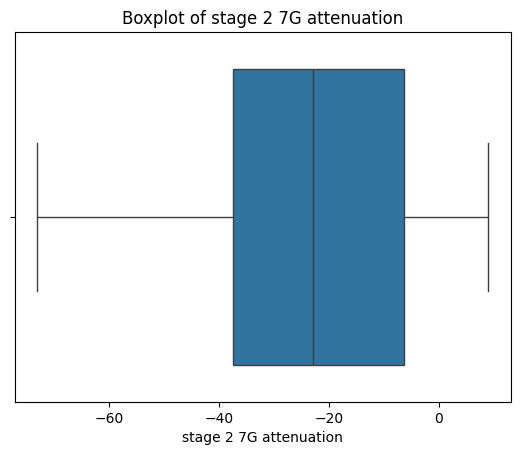

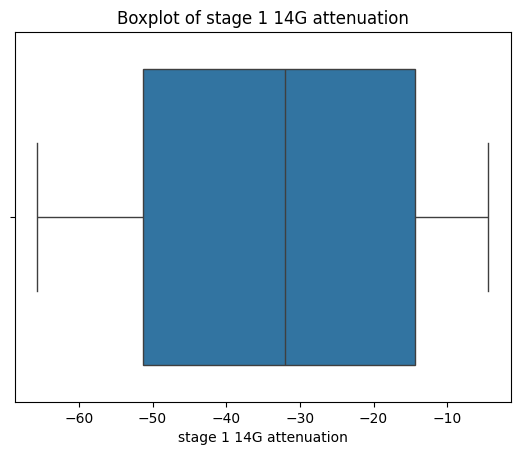

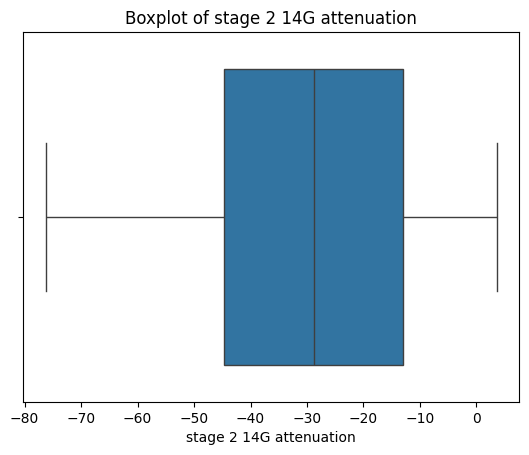

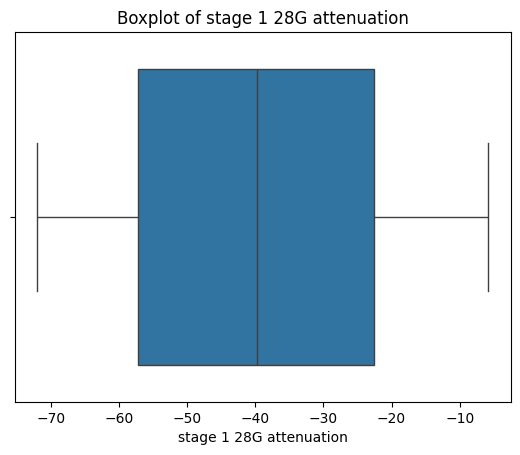

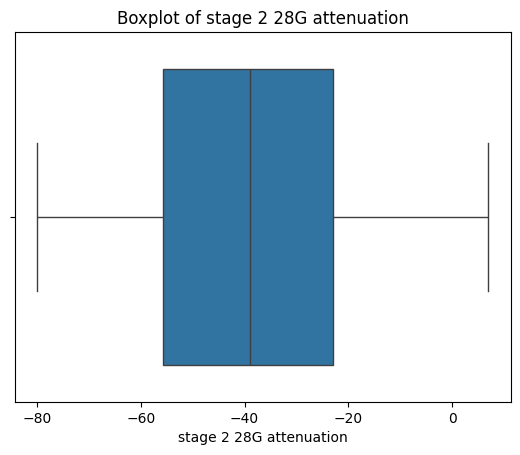

In [68]:
for col in target_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [69]:
# Select only numerical columns for descriptive statistics
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(df[numerical_cols].describe().T)

                                      count          mean           std  \
fW                                   5001.0  5.505101e-06  2.596242e-06   
current                              5001.0  1.501977e-03  5.808392e-04   
ind                                  5001.0  1.510130e-09  8.630843e-10   
Rd                                   5001.0  7.412865e+02  4.314218e+02   
Cs                                   5001.0  4.945844e-13  2.881890e-13   
Rs                                   5001.0  7.489078e+02  4.355479e+02   
Stage 1 Region                       5001.0  3.543291e-01  4.783574e-01   
channel 0.1G attenuation             5001.0 -1.967197e-02  7.056407e-05   
channel 3.5G attenuation             5001.0 -6.587249e+00  8.832163e-03   
channel 7G attenuation               5001.0 -9.091220e+00  1.626241e-02   
channel 14G attenuation              5001.0 -1.315884e+01  1.701011e-02   
channel 28G attenuation              5001.0 -1.886422e+01  2.154512e-02   
stage 1 0.1G attenuation 


Generating Histograms for Numerical Features...


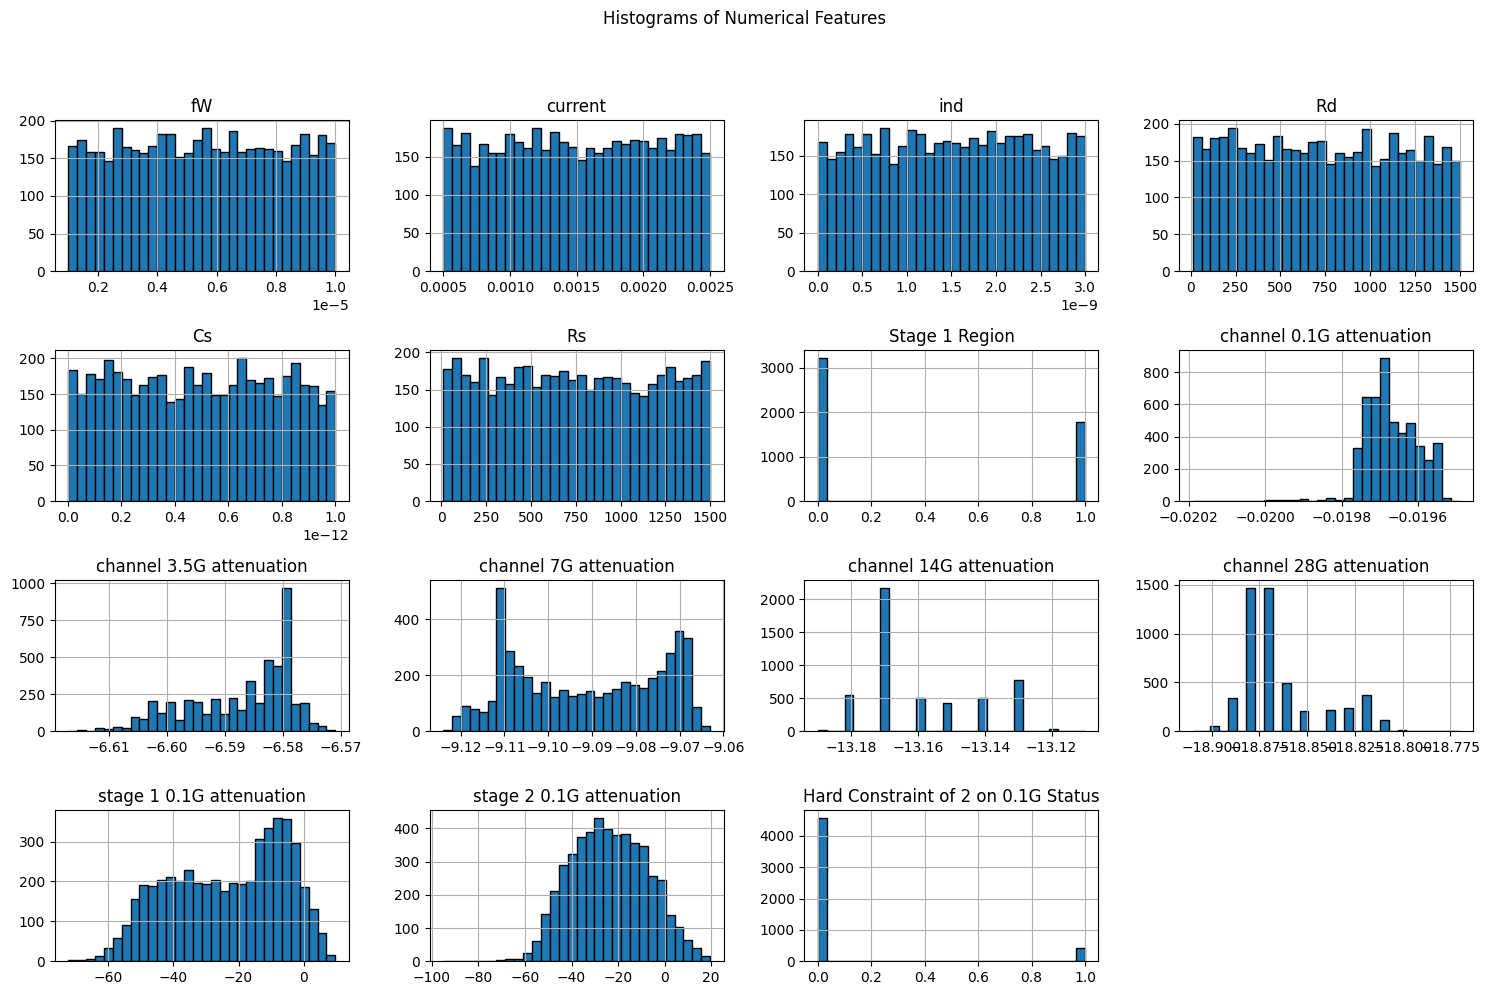

In [70]:
# Visualizations - Histograms for Numerical Features
print("\nGenerating Histograms for Numerical Features...")
# Exclude categorical numerical and target columns from generic histogram plotting
plot_numerical_cols = [
    col
    for col in numerical_cols
    if col not in target_cols
]
df[plot_numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor="black")
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


Generating Box Plots for Numerical Features...


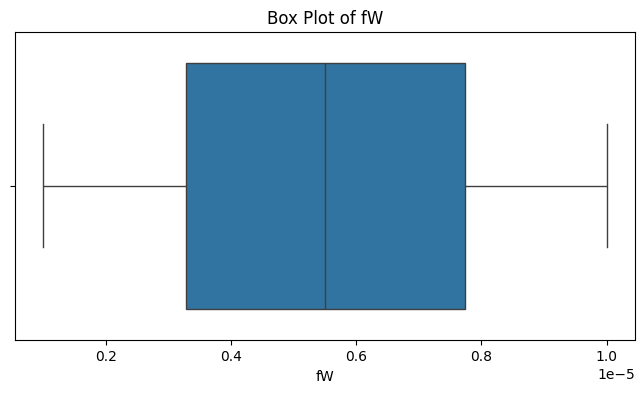

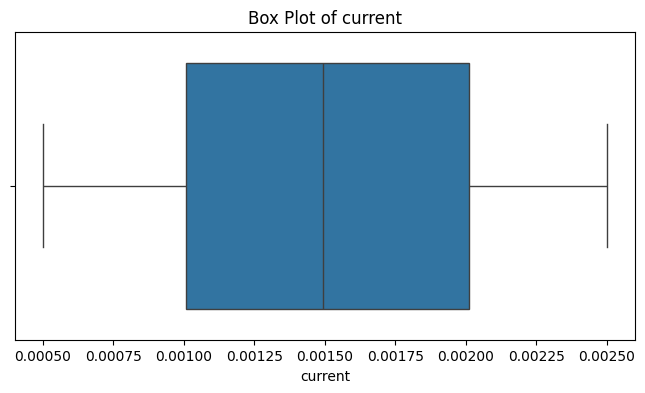

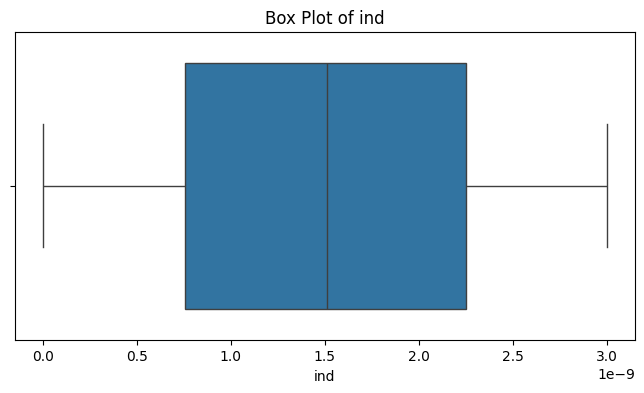

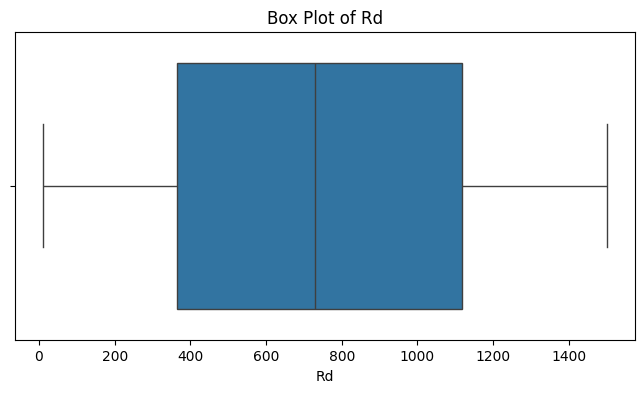

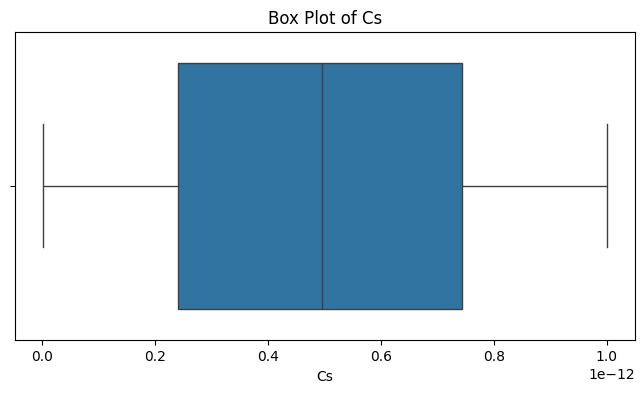

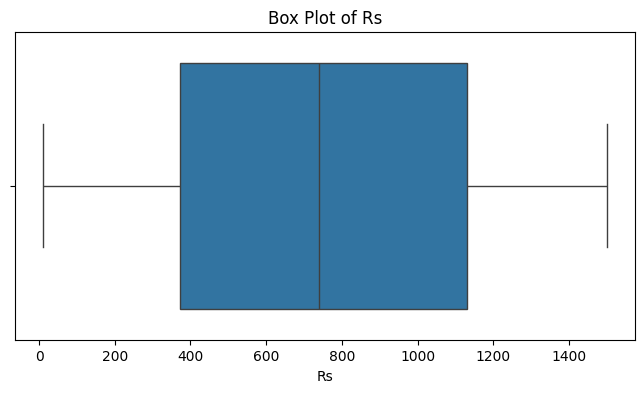

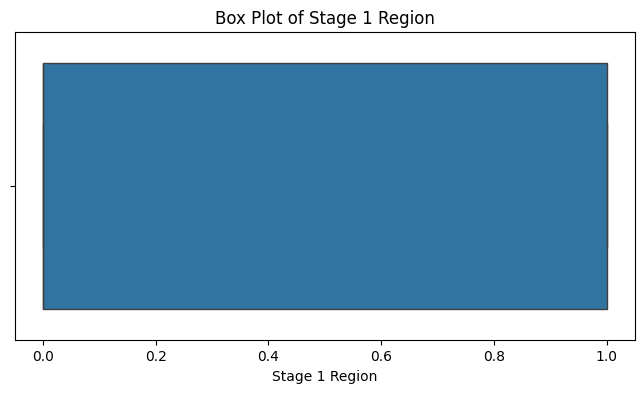

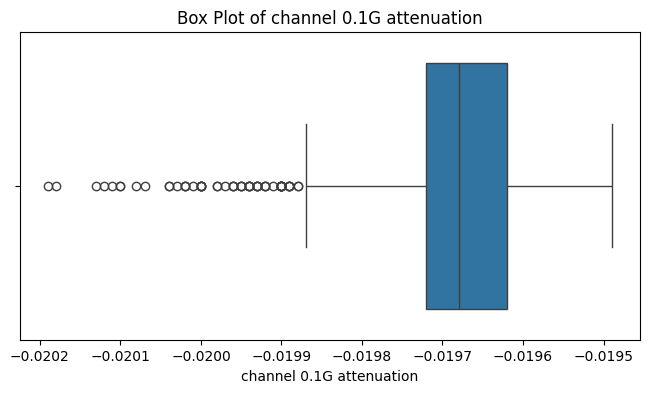

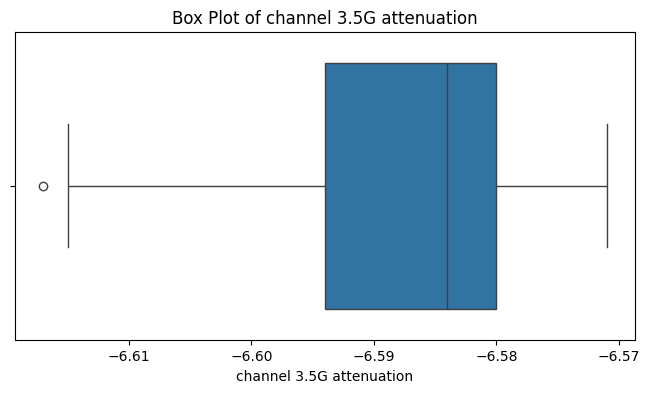

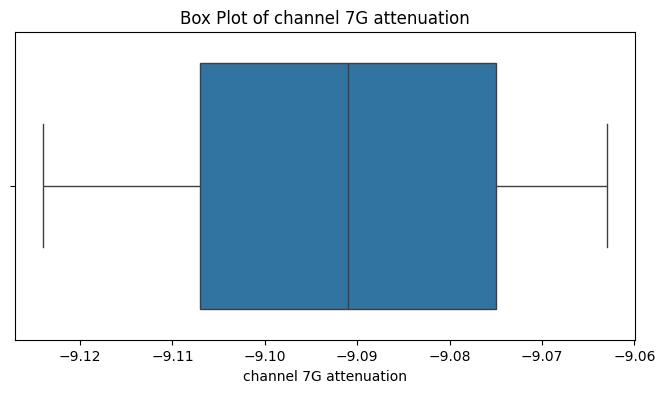

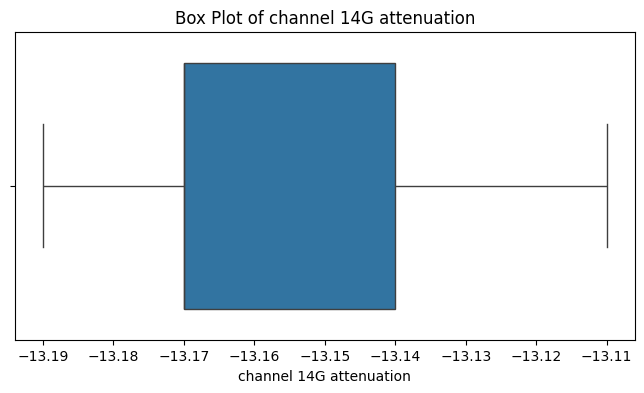

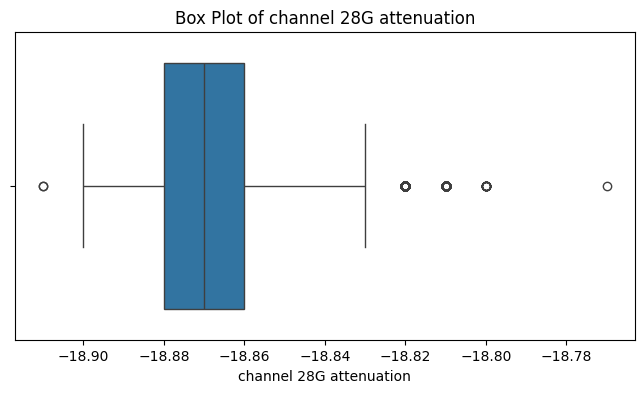

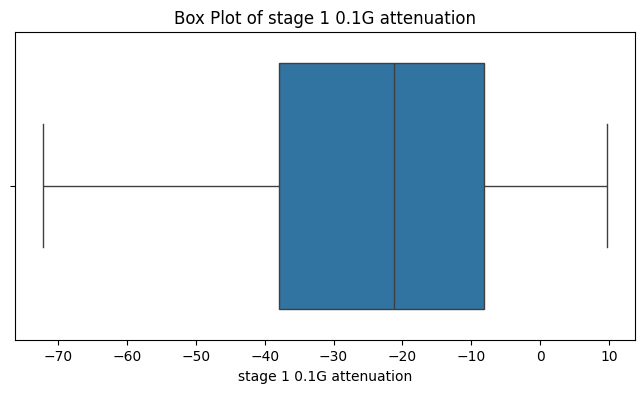

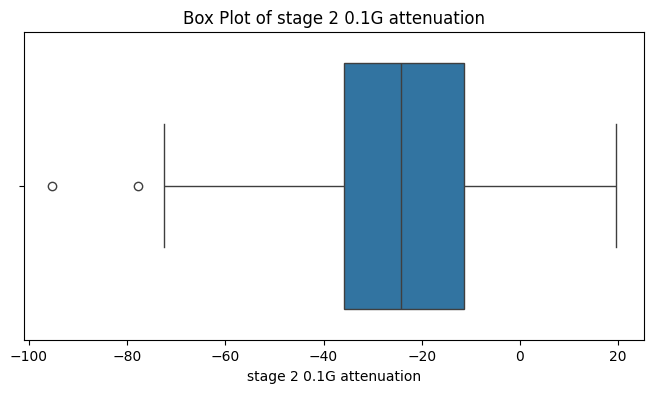

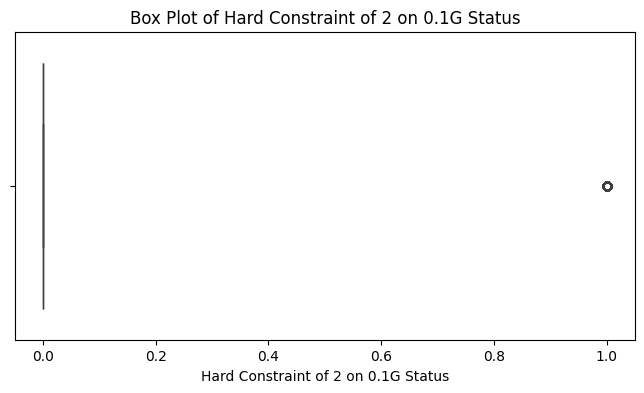

In [74]:
# Visualizations - Box Plots for Numerical Features (for Outlier Detection)
print("\nGenerating Box Plots for Numerical Features...")
for col in plot_numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


Generating Example Scatter Plot ('current' vs. 'stage 1 3.5G attenuation')...


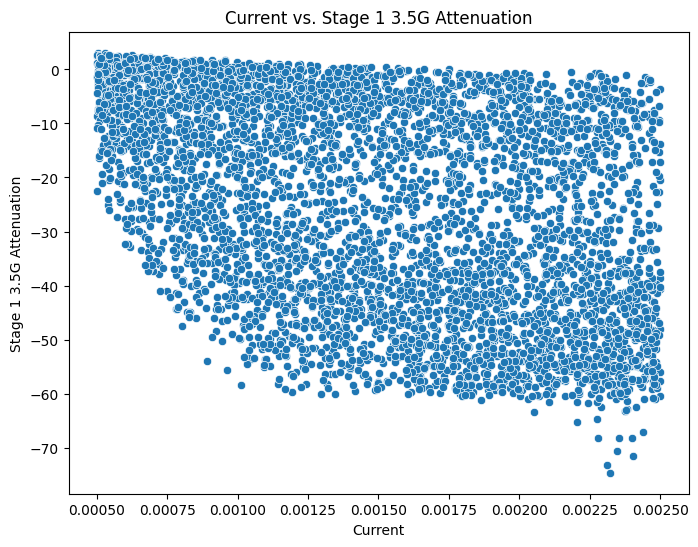

In [72]:
# Scatter Plots (Example: 'current' vs. 'stage 1 3.5G attenuation')
print("\nGenerating Example Scatter Plot ('current' vs. 'stage 1 3.5G attenuation')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="current", y="stage 1 3.5G attenuation", data=df)
plt.title("Current vs. Stage 1 3.5G Attenuation")
plt.xlabel("Current")
plt.ylabel("Stage 1 3.5G Attenuation")
plt.show()


Generating Example Grouped Box Plot ('Stage 1 Region' vs. 'stage 1 3.5G attenuation')...


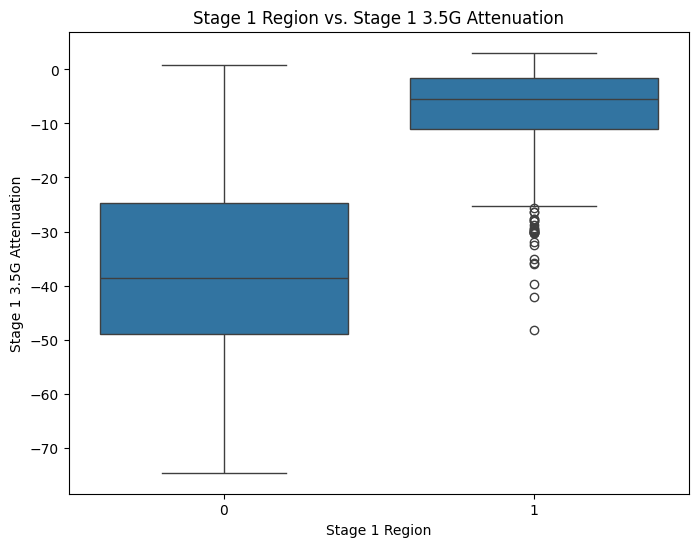

In [73]:
# Grouped Box Plots (Categorical Feature vs. Target - Example: 'Stage 1 Region' vs. 'stage 1 3.5G attenuation')
print(
    "\nGenerating Example Grouped Box Plot ('Stage 1 Region' vs. 'stage 1 3.5G attenuation')..."
)
if "Stage 1 Region" in df.columns and "stage 1 3.5G attenuation" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Stage 1 Region", y="stage 1 3.5G attenuation", data=df)
    plt.title("Stage 1 Region vs. Stage 1 3.5G Attenuation")
    plt.xlabel("Stage 1 Region")
    plt.ylabel("Stage 1 3.5G Attenuation")
    plt.show()
else:
    print(
        "Cannot generate grouped box plot: 'Stage 1 Region' or 'stage 1 3.5G attenuation' not found."
    )